# 260587899 Lim, Dongjoon Assignment2

## First, we define functions that we will use later.

In [1]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

# Get the data from CSV file as Dataframe and drop NaN values
def readFile(filename):
    output = pd.read_csv(filename, delimiter = ',', header=None)
    output = trimLast(output)
    return output

# Convert to numpy to generate gaussian data and revert it back to dataframe. Label each data at the end, 0 for negative, 1 for positive.
def genData(mean, covariance, n, label):
    output = np.random.multivariate_normal(mean.values.flatten(), covariance.values, n)
    output = pd.DataFrame(output)
    if label == 1:
        output[20] = 1
    elif label == 0:
        output[20] = 0
    return output

# Splitting data to 0.2 test 0.2 valid 0.6 train.
def splitData(data):
    test = data.sample(frac=0.2,random_state=42)
    valid = data.drop(test.index)
    valid = data.sample(frac=0.25,random_state=38)
    train = data.drop(test.index | valid.index)
    return test, valid, train

# Save each split to file.
def saveFile(data1, data2, filename):
    output = pd.concat([data1,data2], ignore_index=True)
    output.to_csv(filename)
    return output, output[20]

def saveFile2(data1, data2,data3, data4, data5, data6, filename):
    output = pd.concat([data1,data2,data3,data4,data5,data6], ignore_index=True)
    output.to_csv(filename)
    return output, output[20]

def saveFile3(data1, data2, data3, filename):
    output = pd.concat([data1,data2, data3], ignore_index=True)
    output.to_csv(filename)
    #return output, output[20]

def GDA(data1, data2, p1, p2):
    mean1 = np.array(data1.mean())
    mean2 = np.array(data2.mean())
    dif1 = np.array(data1 -mean1)
    dif2 = np.array(data2 -mean2)
    cov = (np.dot(dif1.T, dif1) + np.dot(dif2.T, dif2)) / float(len(data1) + len(data2))
    w0 = math.log(p1) - math.log(p2) - 0.5 * (np.dot(np.dot(mean1.T, np.linalg.pinv(cov)), mean1) - np.dot(np.dot(mean2.T, np.linalg.pinv(cov)), mean2))
    w1 = np.dot(np.linalg.pinv(cov), mean1 - mean2)
    return w0, w1

# Save each split to file.
def saveFile(data1, data2, filename):
    output = pd.concat([data1,data2], ignore_index=True)
    output.to_csv(filename)
    return output, output[20]

def trimLast(data):
    data = data.iloc[:,:-1]
    return data

def labelClassify(data, isNegative):
    if isNegative:
        return pd.DataFrame(data[data[20] == 0])
    else:
        return pd.DataFrame(data[data[20] == 1])

def metricScore(true_positive, false_positive, false_negative, true_negative):
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    f2 = 2 * precision * recall / (precision + recall)
    return precision, recall, accuracy, f2

def updateScore(predicted, true, tp, fp, tn, fn):
    if predicted == 1:
        if predicted == true:
            tp += 1
        else:
            fp += 1
    if predicted == 0:
        if predicted == true:
            tn += 1
        else:
            fn += 1
    return tp, fp, tn, fn

def KNN(n, train, test, trainLabel):
    true_positive, false_positive, true_negative, false_negative = 0,0,0,0
    for i in range(1, n):
    
        for j in range(len(test)):
            Euclidean = np.array(np.power(abs(train.sub(np.array(np.array(test.loc[[j], :])[0]))), 2).sum(axis=1))
            K_neighbours = np.array([trainLabel[j] for j in np.argpartition(Euclidean, i)[:i]])
            pred_value = 1 if K_neighbours.mean() > 0.5 else 0
            true_value = test_label[j]
            true_positive, false_positive, true_negative, false_negative = updateScore(pred_value, true_value,true_positive, false_positive, true_negative, false_negative)

        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        f2 = 2 * precision * recall / (precision + recall)
        
        list2 = [true_positive, true_negative, false_positive, false_negative]
        scores.append(list2)
        accuList.append(f2)
        print('Accuracy report according to K values')
        print('K = {}, F1 score = {}'.format(i, f2))

def printScores(precision, recall, accuracy, f2):
    print('Performance measures are as below')
    print('F1 score: '+ str(f2))
    print('Accuracy: '+ str(accuracy))
    print('Precision: '+ str(precision))
    print('Recall: '+ str(recall)+ '\n')

## Part1, read and generate data

In [2]:
negative = readFile('DS1_m_0.txt')
positive = readFile('DS1_m_1.txt')
cov = readFile('DS1_Cov.txt')

neg_generated = genData(negative, cov, 2000, 0)
pos_generated = genData(positive, cov, 2000, 1)

negative_test, negative_valid, negative_train = splitData(neg_generated)
positive_test, positive_valid, positive_train = splitData(pos_generated)


train_data, train_label = saveFile(negative_train, positive_train, 'DS1_train.csv')
valid_data, valid_label = saveFile(negative_valid, positive_valid, 'DS1_valid.csv')
test_data, test_label = saveFile(negative_test, positive_test, 'DS1_test.csv')
saveFile3(train_data, valid_data, test_data, 'DS1.csv')

negative_train = labelClassify(train_data, True)
positive_train = labelClassify(train_data, False)

test_data = trimLast(test_data)
valid_data = trimLast(valid_data)
train_data =trimLast(train_data)
negative_train = trimLast(negative_train)
positive_train = trimLast(positive_train)


# Part2, perform GDA and report its parameters

In [3]:
# Compute output prediction
w0,w1 = GDA(negative_train, positive_train, 0.5, 0.5)
predictedY = np.dot(test_data, w1) + w0

# Set prediction to 0 or 1 based on decision boundary
predictedY[predictedY > 0] = 0
predictedY[predictedY < 0] = 1

# Calculate true positive, true negative, false positive, false negative
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for i in range(len(test_label)):
    true_value = test_label[i]
    pred_value = predictedY[i]
    true_positive, false_positive, true_negative, false_negative = updateScore(pred_value, true_value,true_positive, false_positive, true_negative, false_negative)


precision, recall, accuracy, f2 = metricScore(true_positive, false_positive, false_positive, true_negative)
printScores(precision, recall, accuracy, f2)

print('Parameters are as below')
print("w0: "+ str(w0))
print("w1: " + str([i for i in w1]) + "\n")

Performance measures are as below
F1 score: 0.9546599496221663
Accuracy: 0.9548306148055207
Precision: 0.9546599496221663
Recall: 0.9546599496221663

Parameters are as below
w0: 28.151154856835507
w1: [14.821422475214217, -8.922950251537857, -6.114941469383007, -3.4034608371011075, -10.078302737368665, -4.233412337856102, 17.82388053046373, -24.570205573300427, -30.126102298828886, 9.284804673062599, -13.42834347195527, -12.872778366140679, 16.23890393175043, 13.584161030466062, -5.718695343182654, 13.321007714040555, 30.560909217115295, -6.995985287319495, -1.0655407847370881, -5.126035584845911]



# Perform K nearest Neighbours

Accuracy report according to K values
K = 1, F1 score = 0.5038167938931297
Accuracy report according to K values
K = 2, F1 score = 0.44202898550724634
Accuracy report according to K values
K = 3, F1 score = 0.4636488340192044
Accuracy report according to K values
K = 4, F1 score = 0.44961240310077516
Accuracy report according to K values
K = 5, F1 score = 0.4643741403026135
Accuracy report according to K values
K = 6, F1 score = 0.461145905822315
Accuracy report according to K values
K = 7, F1 score = 0.47058823529411764
Accuracy report according to K values
K = 8, F1 score = 0.4678645473393227
Accuracy report according to K values
K = 9, F1 score = 0.4731803677252697
Accuracy report according to K values
K = 10, F1 score = 0.47128331959329495
Accuracy report according to K values
K = 11, F1 score = 0.477334654446371
Accuracy report according to K values
K = 12, F1 score = 0.4779888522352406
Accuracy report according to K values
K = 13, F1 score = 0.4815704291531795
Accuracy report acc

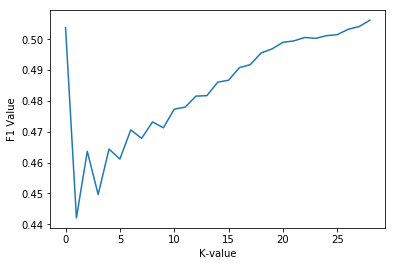

In [4]:
# Variables to keep track of result from each step
scores = []
accuList = []

# Perform knn classifier
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
mylist = [true_positive, true_negative, false_positive, false_negative]
KNN(30, train_data, test_data, train_label)

# Calculate optimal k
bestK = accuList.index(max(accuList))
print("\nBest K Value: ", bestK + 1, '\n')
plt.plot(accuList)
plt.xlabel('K-value')
plt.ylabel('F1 Value')
# Calculate performance metrics
list3 = scores[bestK]

precision, recall, accuracy, f2 = metricScore(list3[0], list3[2], list3[3], list3[1])
printScores(precision, recall, accuracy, f2)

In [5]:
# Prepare Data
negative1 = readFile('DS2_c2_m1.txt')
positive1 = readFile('DS2_c1_m1.txt')
negative2 = readFile('DS2_c2_m2.txt')
positive2 = readFile('DS2_c1_m2.txt')
negative3 = readFile('DS2_c2_m3.txt')
positive3 = readFile('DS2_c1_m3.txt')
cov1 = readFile('DS2_Cov1.txt')
cov2 = readFile('DS2_Cov2.txt')
cov3 = readFile('DS2_Cov3.txt')

neg1 = genData(negative1, cov1, 200, 0)
neg2 = genData(negative2, cov2, 840, 0)
neg3 = genData(negative3, cov3, 960, 0)
pos1 = genData(positive1, cov1, 200, 1)
pos2 = genData(positive2, cov2, 840, 1)
pos3 = genData(positive3, cov3, 960, 1)

negative_test1, negative_valid1, negative_train1 = splitData(neg1)
positive_test1, positive_valid1, positive_train1 = splitData(pos1)
negative_test2, negative_valid2, negative_train2 = splitData(neg2)
positive_test2, positive_valid2, positive_train2 = splitData(pos2)
negative_test3, negative_valid3, negative_train3 = splitData(neg3)
positive_test3, positive_valid3, positive_train3 = splitData(pos3)

train_data, train_label = saveFile2(negative_train1, positive_train1, negative_train2, positive_train2, negative_train3, positive_train3, 'DS2_train.csv')
valid_data, valid_label = saveFile2(negative_valid1, positive_valid1, negative_valid2, positive_valid2, negative_valid3, positive_valid3, 'DS2_valid.csv')
test_data, test_label = saveFile2(negative_test1, positive_test1, negative_test2, positive_test2, negative_test3, positive_test3, 'DS2_test.csv')
saveFile3(train_data, valid_data, test_data, 'DS2.csv')
# Save label vectors
negative_data = labelClassify(train_data, True)
positive_data = labelClassify(train_data, False)

# Trim the label so it won't affect our training
trimLast(negative_data)
trimLast(positive_data)
trimLast(test_data)
trimLast(train_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.984612,1.183361,1.135819,2.429912,1.287490,2.731935,1.426910,1.569338,1.987641,1.335853,0.605862,1.652636,1.217454,0.837609,2.077468,1.490155,1.971925,2.455897,3.142183,1.939878
1,2.869402,0.614268,0.670256,1.410142,0.155386,1.497399,-0.037381,1.348523,2.965874,2.034343,1.892177,0.288264,3.206290,0.300364,2.297159,1.575344,-1.466530,-0.835174,1.926073,0.653400
2,-0.026843,-1.526729,-0.449427,-0.685406,0.169626,-0.586785,0.541552,0.697883,-1.430686,-0.989689,-0.580683,-1.844042,0.923889,0.739683,0.337617,1.200181,-0.759832,-0.197650,0.098382,-0.283835
3,-0.278347,2.224784,1.005564,0.907589,1.606896,-1.032589,1.429265,0.816050,2.455767,2.567306,2.857454,0.689940,0.050140,-0.953606,1.834185,-0.438939,-0.407080,0.566462,0.176488,0.364827
4,2.997374,3.811292,2.132826,3.408554,1.215906,1.779125,2.402862,3.318332,1.534734,3.386849,2.880983,4.237691,1.355020,2.664164,2.800378,3.953632,1.595234,2.560471,1.972694,2.176808
5,0.143478,2.486903,2.984542,2.562270,3.948612,3.646156,2.863411,3.520183,6.323873,1.234652,2.448683,1.657185,3.997984,0.513531,2.979874,0.508391,3.422095,2.925004,4.849442,5.597857
6,1.910227,3.712945,4.470068,4.082767,2.622823,4.486681,4.328284,3.841677,5.053704,4.473967,6.885263,3.888039,3.138608,4.934129,4.141225,3.267240,2.045943,5.284294,4.536829,5.166004
7,1.000051,0.708541,0.491615,-0.952459,2.528341,1.838593,2.589693,1.319924,-2.534147,0.013542,-0.623281,0.015891,0.765797,3.390204,0.444066,2.867488,2.556629,3.934778,1.821998,1.524816
8,0.366070,-2.410259,-4.355006,-0.025111,-1.538080,-0.763928,-1.835588,-0.423165,-1.658732,0.695431,-1.631651,-0.723546,0.961738,-2.029151,2.154827,-0.905593,-1.972030,0.188370,1.119218,-1.528905
9,0.850403,-0.487449,-0.189321,1.284471,-1.780807,-0.896712,-0.851845,-1.121557,-0.089751,-2.103975,-0.958781,0.560601,-1.227507,-1.139159,-1.383291,-1.166399,-1.213999,-1.942553,-0.959573,-1.268095


## GDA 

In [6]:
w0,w1 = GDA(negative_data, positive_data, 0.5, 0.5)

# Compute output prediction
predictedY = np.dot(test_data, w1) + w0

predictedY[predictedY > 0] = 0
predictedY[predictedY < 0] = 1

# Calculate true positive, true negative, false positive, false negative
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for i in range(len(test_label)):
    true_value = test_label[i]
    pred_value = predictedY[i]
    true_positive, false_positive, true_negative, false_negative = updateScore(pred_value, true_value,true_positive, false_positive, true_negative, false_negative)


precision, recall, accuracy, f2 = metricScore(true_positive, false_positive, false_negative, true_negative)
printScores(precision, recall, accuracy, f2)

print("w0: ", w0, '\n')
print("w1: " + str([i for i in w1]) + "\n")

Performance measures are as below
F1 score: 0.5223880597014926
Accuracy: 0.52
Precision: 0.5198019801980198
Recall: 0.525

w0:  -0.04996462056759876 

w1: [0.020093919298049934, -0.04065704575102737, -0.043156394476313004, 0.008797049161177913, 0.051507080533167465, -0.0707084375481069, 0.013149544977385574, 0.019469579072639326, 0.05838735825005566, -0.04424735382114038, -0.07661868897550195, 0.03455294850082166, 0.057897543038496056, 0.009904603332280132, -0.026632711465336315, -0.00507539318663823, 0.05219704306988138, -0.00996703121612802, 0.05455188257599919, -0.021396718383598995, 0.0]



## KNN

Accuracy report according to K values
K = 1, F1 score = 0.6059850374064838
Accuracy report according to K values
K = 2, F1 score = 0.5448129851799577
Accuracy report according to K values
K = 3, F1 score = 0.5705272645335736
Accuracy report according to K values
K = 4, F1 score = 0.5621959694232105
Accuracy report according to K values
K = 5, F1 score = 0.5760693015701137
Accuracy report according to K values
K = 6, F1 score = 0.575
Accuracy report according to K values
K = 7, F1 score = 0.5853284811338824
Accuracy report according to K values
K = 8, F1 score = 0.5850294365012617
Accuracy report according to K values
K = 9, F1 score = 0.5895731797371142
Accuracy report according to K values
K = 10, F1 score = 0.5902250632574244
Accuracy report according to K values
K = 11, F1 score = 0.5952038369304558
Accuracy report according to K values
K = 12, F1 score = 0.5963252282979425
Accuracy report according to K values
K = 13, F1 score = 0.6018928715263794
Accuracy report according to K val

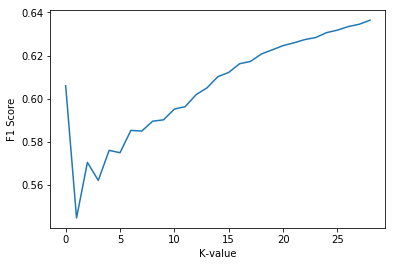

In [7]:
# Variables to keep track of result from each step
scores = []
accuList = []

# Perform knn classifier
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

KNN(30, train_data, test_data, train_label)

# Calculate optimal k
bestK = accuList.index(max(accuList))
print("\nBest K Value: ", bestK + 1, '\n')
#plt.plot(list(range(199)), accuList)
# Calculate performance metrics
list3 = scores[bestK]
plt.plot(accuList)
plt.xlabel('K-value')
plt.ylabel('F1 Score')
precision, recall, accuracy, f2 = metricScore(list3[0], list3[2], list3[3], list3[1])
printScores(precision, recall, accuracy, f2)